<a href="https://colab.research.google.com/github/sid1336/Computational-physics/blob/main/a4_feedback_95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utkarsh sachdeva(sid)
<br>
Due date: Feb. 6, 2024, 11:59pm
<br>
PHYS 2030 W24


# <center><font color=#46769B>Homework assignment 4</font></center>

__Rubric (100 points total)__: 95

- Problem 1 - __40 points__: 35 (percentage photons)
     
- Problem 2 - __30 points__: 30

- Problem 3 - __30 points__: 30
     
</font>

## <font color=#46769B>Introduction:</font>

Our goals for this notebook are:
- Use importance sampling to describe a target distribution.
- Quantify good vs bad proposal distributions for importance sampling
- Gain familiarity with data fitting

Required reading:
- *Lesson 4: Importance Sampling*

## <font color=#46769B>Problem 1: Black-body radiation and the Sun</font>

### <font color=#46769B>Introduction:</font>

[Black-body radiation](https://en.wikipedia.org/wiki/Black-body_radiation) is the characteristic electromagnetic radiation that is emitted from an object with temperature $T$.
(You are no doubt aware of the fact that hot objects can radiate infrared and visible light. But if you are not familiar with this topic - and its context in the history of important discoveries in physics - you may want to [watch a video](https://www.youtube.com/watch?v=7BXvc9W97iU).)

For an ideal black body with temperature $T$, light is emitted with a continuous range of frequencies $\nu$ known as the black-body spectrum. The formula for the black-body spectrum is given by Planck's Law<font color=red>$^1$</font>

$$B_\nu(T) = \frac{2 h \nu^3}{c^2} \frac{1}{e^{h\nu/k_B T} - 1} $$

Here $B_\nu(T)$ is known as the *spectral radiance*.  This formula gives the amount of power (energy-per-unit-time) emitted in photons of frequency $\nu$ from a black body with temperature $T$.<font color=red>$^2$</font>
We also have Planck's constant $h$, the speed of light $c$, and Boltzmann's constant $k_B$.

Now we will consider the probability distribution function (PDF) for black-body photons, $P(\nu)$, the probability (density) for the black body to emit a photon with a given frequency $\nu$. (That is, $P(\nu) d\nu$ is the probability that a given photon has frequency in the interval $[\nu,\nu+d\nu]$.) The PDF $P(\nu)$ must be proportional to the spectral radiance divided by the energy per photon, $E = h \nu$, i.e., $P(\nu) \propto B_\nu(T)/(h \nu)$.
The constant of proportionality is fixed by requiring $\int_{0}^\infty d\nu \, P(\nu) = 1$.

Following this logic, we have the PDF for photon frequency from a black body:

$$P(\nu) = \left\{ \begin{array}{cc} \frac{C\nu^2 h^3}{(k_B T)^3} \left(e^{\frac{h \nu}{k_B T}} -1 \right)^{-1} & {\rm for} \; \nu > 0 \\
0 & {\rm otherwise} \end{array} \right. \, , \qquad (1)$$

where $C = 0.415954$ is a numerical constant.

We will use a Monte Carlo simulation to analyze the photon frequencies, sampling $\nu$ from $P(\nu)$ in Eq. (1). We cannot (easily) use the inverse CDF method here, since the CDF cannot be computed in terms of elementary functions. So, we turn to  __importance sampling__ instead.

#### <font color=#46769B>Footnotes:</font>

<font color=red>$^1$</font> While the functional form of the black-body spectrum was first discovered by Planck, it was later derived by [Bose](https://physicstoday.scitation.org/do/10.1063/PT.5.031387/full/) in his pioneering work on statistical mechanics of quantum systems.
Bose sent his paper on the subject to Einstein, along with this beautifully aspirational accompanying [letter](https://www.reddit.com/r/Physics/comments/inocza/bose_letter_to_einstein_which_accompanied_his/).
Einstein, recognizing its importance, translated Bose's work into German and facilitated its publication.
The word *boson* is named in honor of Bose.
Planck's black-body spectrum is now understood to be a special case of *Bose-Einstein distributions*.

<font color=red>$^2$</font> To be more precise, $B_\nu(T)$ is the power per unit frequency $\nu$, per unit surface area of the black body, and per unit solid angle that the light is emitted into.

### <font color=#46769B>Problem</font>

The Sun is (very) approximately a black body, with a surface temperature of around $T = 5800 \; {\rm K}$. Here you will use importance sampling to perform a Monte Carlo simulation for photons emitted from the Sun.

Take an exponential proposal distribution for $\nu$:

$$Q(E) = \left\{ \begin{array}{cc} a e^{-a \nu} & {\rm for} \; \nu \ge 0 \\
0 & {\rm otherwise} \end{array} \right. \, , \qquad (2)$$

where $a$ is a constant. Complete the following tasks:

- Setting $a = h/(k_B T)$, generate $N=10^5$ samples for $\nu$ from $Q$ using the inverse CDF method.
- Calculate the weights $w = P(\nu)/Q(\nu)$ for your samples and verify (print) that the mean of the weights is close to one.
- Make a plot that shows:
    - Unweighted histogram of your samples for $\nu$ and plot of the proposal distribution $Q(\nu)$ (these should agree).
    - Weighted histogram of your samples for $\nu$ and plot of the target distribution $P(\nu)$ (these should agree).
    - Choose an appropriate number of bins and include a legend and $x$-axis label on your plot. Be sure to set `alpha=0.5` for your histograms.

Note: the typical $\nu$ values will be of order $10^{14} - 10^{15} \; {\rm Hz}$.

Next, the photon wavelength is related to frequency by $\lambda = c/\nu$.

- Using your samples, calculate the *weighted* mean $\langle \lambda \rangle$ and standard deviation $\Delta \lambda$ for solar photon wavelengths. Express your results in ${\rm nm}$ (nanometers).

- Plot a histogram of your weighted samples for $\lambda$ (in nm). Setting `bins=np.linspace(0,2500,num=30)` will help generate a nice-looking histogram. Include a label for the $x$-axis.

- For comparison, the visible spectrum of light spans around 380 to 700 nm. Compute the percentage of the Sun's photons that fall within this range, $380-700 \; {\rm nm}$. (*Hint:* Do not simply count the number of samples where $380 < \lambda < 700$. This will be the fraction with respect to your *unweighted* samples.)

- Compute the percentage of the Sun's energy that falls within this range.

The fact that a sizable fraction of the Sun's energy output falls within the "visible" range explains why our eyes have adapted to this range.

mean of the weights is: 0.9942252103536479


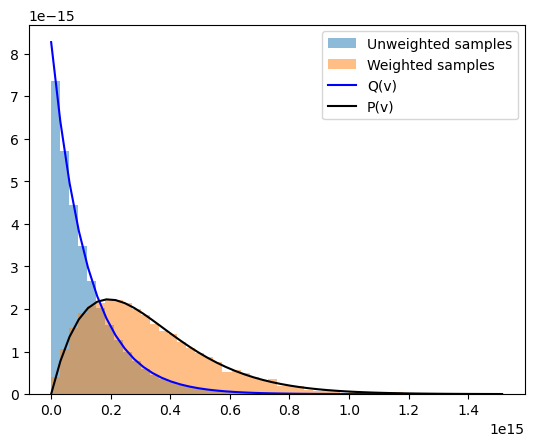

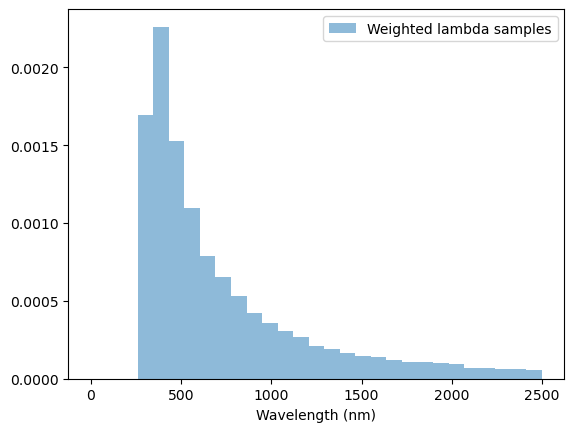

The percentage of the Sun's photons in the visible range is: 40.07%
The percentage of the Sun's energy in the visible range is: 44.34%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants in SI units
h = 6.62607015e-34
kB = 1.380649e-23
c = 299792458
T = 5800
C = 0.415954
a = h / (kB * T)
num = 10**5

# P(v)
def P(v):
    return (C * (v**2) * (h**3)) / (kB * T)**3 * (np.exp((h * v) / (kB * T)) - 1)**-1

# Q(v)
def Q(v):
    return a * np.exp(-a * v)

# Generate samples for v from Q
r = np.random.rand(num)
v_samples = -1 / a * np.log(1 - r)

# Calculate the weights
w = P(v_samples) / Q(v_samples)
print(f'mean of the weights is: {np.mean(w)}')

# Adjust the range of v for plotting P(v) and Q(v)
v = np.linspace(min(v_samples), max(v_samples))

# Unweighted histogram
plt.hist(v_samples, bins=50, alpha=0.5, density=True, label='Unweighted samples')

# Weighted histogram
plt.hist(v_samples, bins=50, alpha=0.5, weights=w, density=True, label='Weighted samples')

# Plot P(v) and Q(v) using the adjusted v range
plt.plot(v, Q(v), label='Q(v)', color='blue')
plt.plot(v, P(v), label='P(v)', color='black')
plt.legend()
plt.show()

# Convert frequency to wavelength
nu_samples = np.linspace(10**14, 10**15, num)  # Hz
lambda_samples = c / nu_samples * 10**9  # nm

# Calculate weighted mean & std
std_lambda = np.sqrt(np.average((lambda_samples - np.average(lambda_samples, weights=w))**2, weights=w))
w_mean_lambda = np.average(lambda_samples, weights=w)

# Plot weighted lambda samples
plt.hist(lambda_samples, bins=np.linspace(0, 2500, num=30), alpha=0.5, weights=w, density=True,
         label='Weighted lambda samples')
plt.xlabel('Wavelength (nm)')
plt.legend()
plt.show()

# Calculate the percentage of the Sun's photons and energy in the visible range
visible_spectrum = np.sum((lambda_samples > 380) & (lambda_samples < 700))
percentage_photon = visible_spectrum / num * 100
print(f"The percentage of the Sun's photons in the visible range is: {percentage_photon:.2f}%")

energy_in_range = np.sum(h * nu_samples * ((lambda_samples > 380) & (lambda_samples < 700)))
total_energy = np.sum(h * nu_samples)
percentage_energy = energy_in_range / total_energy * 100
print(f"The percentage of the Sun's energy in the visible range is: {percentage_energy:.2f}%")

## <font color=#46769B>Problem 2: How good is a proposal distribution?</font>

### <font color=#46769B>Introduction</font>

In importance sampling, you are free to choose your proposal distribution. The lectures give you some idea for how to choose a good proposal distribution. Here we will revisit the PDF for neutron beta decay in Exercise 3:

$$P(E) = \left\{ \begin{array}{cl} A E \sqrt{E^2 - E_m^2} (E_{\rm max} - E)^2 & {\rm for} \; E_m \le E \le E_{\rm max} \\
0 & {\rm otherwise} \end{array} \right. \, , \qquad (3)$$

where $E$ is the energy of the electron (in units of ${\rm MeV}$). The minimum electron energy is given by its rest mass energy $E_m = 0.511 \; {\rm MeV}$, maximum available energy is $E_{\rm max} = 1.292 \; {\rm MeV}$, and
$A = 17.661$ is a normalizing constant.

In the exercise, we did importance sampling with a uniform proposal distribution $Q(E)$. Here you will consider another choice of proposal distribution and assess which one is better.

How is this done? Let's back up and go through the argument for importance sampling. Suppose we have a quantity $x$ and we want to calculate mean of a function $f(x)$, with respect to $P(x)$:

$$\overline{f(x)}_P = \int_{-\infty}^{+\infty} dx \, P(x) \, f(x) \, , \qquad (4) $$

Importance sampling says we insert $1 = Q(x)/Q(x)$ under the integral. Then Eq. (4) becomes

$$\overline{f(x)}_P = \int_{-\infty}^{+\infty} dx \, \frac{P(x) f(x)}{Q(x)} \, Q(x) = \overline{\frac{P(x) f(x)}{Q(x)}}_Q\, . $$

Then we approximate the right-hand side by Monte Carlo sampling from $Q(x)$ and computing the mean

$$\left\langle \frac{P(x) f(x)}{Q(x)} \right\rangle = \sum_{i=0}^{N-1} \frac{P(x_i)}{Q(x_i)} f(x_i) = \langle f(x) \rangle_w$$

which is the formula for the weighted mean, since $w_i = P(x_i)/Q(x_i)$ is the weight for each sample $x_i$.

Now, we want our proposal distribution $Q(x)$ to give us the best approximation for the true mean. What $Q(x)$ gives us the best result? It turns out that we want $Q(x)$ to be largest where integrand in Eq. (4), $P(x) f(x)$, is largest. (Consider $f(x)$ to be a nonnegative function, for simplicity, though this is not a requirement.)

Intuitively, it is easy to understand, especially if you think of each sample $x_i$ as a *measurement*.

- If most of our measurements are where the integrand $f(x) P(x)$ gives the most contribution to the integral in (4), we will get accurate results.

- If most of our measurements are where the integrand $f(x) P(x)$ does not contribute much to the integral, we will get less accurate results. Only a few samples, with large weights, will contribute. Effectively it's as if we had chosen a much smaller value of $N$.

That is, we want $Q(x)$ to be large where $P(x) f(x)$ is large, and small where $P(x) f(x)$ is small. In fact, the optimal choice is when $Q(x)$ is *proportional* to $P(x) f(x)$:

$$Q(x) \; \propto \; P(x) f(x) \qquad (4)$$

i.e., $Q(x)$ is equal to $P(x) f(x)$ up to a normalizing constant required by having $Q(x)$ normalized to one. (A proof of this can be found [here](https://stats.stackexchange.com/questions/324668/how-is-this-minimum-variance-worked-out-for-this-importance-sampling-estimator), but we will not prove it here.) Note that:

- The best choice of $Q(x)$ depends not just on $P(x)$, but also on the function $f(x)$ we are calculating the mean of.

- In practice, taking $Q(x)$ as in Eq. (4) is probably not an option. Since we assumed we couldn't sample from $P(x)$ directly, it is probably not possible to sample from Eq. (4) either!

This gives us an idea for how to quantify the goodness of $Q(x)$: calculate the variance of $P(x)f(x)/Q(x)$

$$\Delta\left(\frac{P(x)f(x)}{Q(x)}\right)^2 \qquad (5)$$

For the optimal choice of $Q(x)$ in (4), we have $P(x)f(x)/Q(x) = {\rm constant}$ for every sample, and therefore there is zero variance. The larger Eq. (5), the worse our proposal distribution.

Eq. (5) is easily calculated once you have your samples `x` and your weights `w`. We just need to evaluate

```py
np.var(w*f(x))
```

The smaller this number, the better our proposal distribution.

### <font color=#46769B>Problem</font>

First, repeat some steps from Exercise 3, for a target distribution $P(E)$ given in Eq. (3) above:

- Take a uniform proposal distribution $Q(E)$ that is constant in the domain $[E_m,E_{\rm max}]$ and zero otherwise. (Be sure your distribution is normalized correctly.)

- Generate $N = 10^5$ samples for $E$ from $Q(E)$.

- Compute the weights $w = P(E)/Q(E)$ from your samples and calculate (and print your result for) the mean energy $\langle E \rangle$.

- Calculate (and print your result for) the variance given in Eq. (5), taking $f(E) = E$. That is, you want to calculate

```py
np.var(w*E)
```

Next, repeat these steps with taking $Q(E)$ to be a normal distribution, with mean and standard deviation $\mu_Q$ and $\sigma_Q$. Choose any values of $\mu_Q$ and $\sigma_Q$ you like such that your calculation of `np.var(w*E)` is lower than what you calculated with a uniform proposal distribution.



In [ ]:
E_rest = 0.511  # MeV
E_max = 1.292  # MeV
A = 17.611

# Define P(e)
def P(e):
    return (A * e) * np.sqrt(e**2 - E_rest**2) * ((E_max - e)**2) if (e >= 0.511) and (e <= 1.292) else 0.0

# Define Q(e)
def Q(e):
    return 1.28 if (e >= 0.511) and (e <= 1.292) else 0.0

# Vectorize P and Q functions
P = np.vectorize(P)
Q = np.vectorize(Q)

# Sample E from Q(e)
num_samples = 10**5
e_samples_uniform = np.random.uniform(E_rest, E_max, num_samples)
weights_uniform = P(e_samples_uniform) / Q(e_samples_uniform)

# Calculate the mean energy for the uniform distribution
mean_energy_uniform = np.mean(e_samples_uniform)
print(f"The mean energy (uniform distribution) is: {mean_energy_uniform:.2f}")

# Calculate the variance for the uniform distribution
variance_uniform = np.var(weights_uniform * e_samples_uniform)
print(f"The variance (uniform distribution): {variance_uniform:.2f}")

# Define Q(e) as a normal distribution
mu, sigma = 0.9, 0.2
def Q_normal(e):
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * (e - mu)**2 / sigma**2)

# Vectorize Q_normal function
Q_normal = np.vectorize(Q_normal)

# Sample E from Q(e) as a normal distribution
e_samples_normal = np.random.normal(mu, sigma, num_samples)
weights_normal = P(e_samples_normal) / Q_normal(e_samples_normal)

# Calculate the mean energy for the normal distribution
mean_energy_normal = np.mean(e_samples_normal)
print(f"The mean energy (normal distribution) is: {mean_energy_normal:.2f}")

# Calculate the variance for the normal distribution
variance_normal = np.var(weights_normal * e_samples_normal)
print(f"The variance (normal distribution): {variance_normal:.2f}")


The mean energy (uniform distribution) is: 0.90
The variance (uniform distribution): 0.19
The mean energy (normal distribution) is: 0.90
The variance (normal distribution): 0.11


## <font color=#46769B>Problem 3: Inverse problems</font>

### <font color=#46769B>Introduction</font>

Monte Carlo sampling is a really useful tool for fitting data. Let's illustrate the idea with a few simple examples.

<u>Example 1:</u> Suppose you have several different measurements for a parameter $x$, e.g.,

$$x = 3.8 \pm 0.3, \; 3.4 \pm 2.2 , \; 5.0 \pm 1.2 , \;  4.2 \pm 0.1 \, , \;  {\rm etc.}$$

How do you combine these different measurements to find the best value for $x$ (and its uncertainty)? Note that the uncertainties are different and the best value of $x$ is not simply the mean of all these measurements. Intuitively, we expect that measurements with smaller uncertainties should carry more weight when determining the best value for $x$, $x$ is probably closer to $3.8$ and $4.2$ compared to the other values.

<u>Example 2:</u> Suppose we have an object in uniform motion, with position as a function of time given by

$$x(t) = v t \, ,$$

where $v$ is the velocity and the initial position at $t=0$ is $x(0) = 0$. Now suppose $x$ measurements are positions *at different times* $t_1, t_2, {\rm etc}$, e.g.,

$$x(t_1) = 0.8 \pm 0.3, \; x(t_2) = 1.8 \pm 0.8 , \; x(t_3) = 2.0 \pm 0.2 , \;  x(t_4) = 2.5 \pm 0.5 \, ,  \; {\rm etc.}$$

How do we use the data to determine $v$ (and its uncertainties)?

Problems of these types are known as __inverse problems__. In a "non-inverse" problem, we have a PDF that we use to calculate something (an observable). Here, we are going in the opposite direction: using the observables (measured by observations) to determine the PDF for the parameters that determine the observables.

Another name for all this is __model fitting__ or __fitting a model to data__. The idea is:

- Write down a model to describe the data
- The model depends one or more unknown parameters
- Sample the parameters with a Monte Carlo simulation
- Use the data to determine which samples are good or bad fits

In the second example, the model was *uniform motion*, described by the function $x(t) = v t$. The unknown parameter is $v$, which we will show how to fit using data. In the first example, the model is trivial: it is just *a constant* and that constant is the parameter to be fit.

We will go through how to use Monte Carlo sampling (and importance sampling specifically) to answer the questions raised here, step-by-step.

<u>Example 1: Finding the best value.</u> The steps are:

1. Generate $N$ samples for $x$ from a proposal distribution $Q(x)$ of your choice.

2. Define the target distribution $P(x)$ for your samples. $P(x)$ is where we compare $x$ to data (the different measurements for $x$). Large $P(x)$ means $x$ fits the data well, and small $P(x)$ means $x$ does not.

3. Calculate the weights $w_i = P(x_i)/Q(x_i)$ for your samples $x_i$. (In practice, this formula will be modified, discussed below.)

4. The "best value" of $x$ is the weighted mean
$$\langle x \rangle = \frac{1}{N} \sum_{i=0}^{N-1} w_i x_i$$
The uncertainty is the weighted standard deviation $\Delta x$, computed as the square root of the weighted variance
$$\Delta x^2 = \langle x^2 \rangle - \langle x \rangle^2$$
where $\langle x^2 \rangle = \sum_i w_i x_i^2$.

Lastly, we need to specify what $P(x)$ is. We will denote the different measurements for $x$ in terms of their central values $\mu_a$ and uncertainties $\sigma_a$, i.e.,

$$x = \mu_1 \pm \sigma_1 , \; \mu_2 \pm \sigma_2 , \; \mu_3 \pm \sigma_3 , \; {\rm etc.}$$

where index $a = 1,2,3, {\rm etc}$ labels the different measurements. Here we calculate the $\chi^2$ as a function of $x$:

$$\chi^2(x) = \frac{(x - \mu_1)^2}{\sigma_1^2} + \frac{(x - \mu_2)^2}{\sigma_2^2} + \frac{(x - \mu_3)^2}{\sigma_3^2} + \dots
= \sum_a \frac{(x - \mu_a)^2}{\sigma_a^2} \qquad (1) $$

Note that all the $\mu_a$ and $\sigma_a$ are just numbers that come from the data, and so $\chi^2(x)$ is just a function of our unknown $x$. The probability density is related to the $\chi^2$ by

$$P(x) \propto e^{-\tfrac{1}{2} \chi^2(x)}$$

A few comments:
- There are a few assumptions implicit defining $P(x)$ in terms of the $\chi^2$, which we won't discuss much. The most important one is that the measurements of $x$ are all *independent* from one another. If everyone is measuring $x$ with the same biased apparatus, that would not be independent.

- We don't know the overall constant for $P(x)$, which is fixed by requiring $\int dx \, P(x) = 1$ when integrated over all $x$ values.

To deal with the second point, we will consider the *unnormalized* PDF

$$P(x) = e^{-\tfrac{1}{2} \chi^2(x)} \, , \qquad (2)$$

such that $\int dx \, P(x) \ne 1$. Now we need to change our formula for the weights so that the incorrect normalization factor for $P(x)$ cancels out:

$$w_i = \frac{ P(x_i)/Q(x_i) }{\frac{1}{N} \sum_j P(x_j)/Q(x_j) } \qquad (3) $$

Recall that if we had normalized $P(x)$ properly the term in the denominator would be (approximately) 1, and we would get back the usual formula. The following lines of code are what you need to do this:

```py
w_unnormalized = P(x)/Q(x)
w = w_unnormalized/np.mean(w_unnormalized)
```

<u>Example 2: Fitting a model to data.</u> We have a model $x(t) = v t$. We have our data points for $x$:

$$x(t_1) = \mu_1 \pm \sigma_1 , \; x(t_2) = \mu_2 \pm \sigma_2 , \; x(t_3) = \mu_3 \pm \sigma_3 , \; {\rm etc.}$$

where $\mu_a$ is central value, $\sigma_a$ is uncertainty, and now we have another quantity $t_a$ that is the *time* for each data point.

1. Generate $N$ samples for $v$ from a proposal distribution $Q(v)$ of your choice.

2. Evaluate the target distribution $P(v)$ for your samples. Now the $\chi^2$ function depends on $v$ (since all $\mu_a, \sigma_a, t_a$ are just numbers):

$$\chi^2(v) = \frac{(x(t_1) - \mu_1)^2}{\sigma_1^2} + \frac{(x(t_2) - \mu_2)^2}{\sigma_2^2} + \frac{(x(t_3) - \mu_3)^2}{\sigma_3^2} + \dots
= \sum_a \frac{(x(t_a) - \mu_a)^2}{\sigma_a^2}
= \sum_a \frac{(v t_a - \mu_a)^2}{\sigma_a^2} \qquad (4) $$

3. Calculate the (normalized) weights

$$w_i = \frac{ P(v_i)/Q(v_i) }{\frac{1}{N} \sum_j P(v_j)/Q(v_j) } \qquad (5) $$

4. The "best value" of $v$ is the weighted mean $\langle v \rangle$ and the uncertainty is the weighted standard deviation $\Delta v$.

### <font color=#46769B>Problem</font>

Consider an object that starts at rest and moves with a uniform acceleration due to gravity. Let $y(t)$ denote the distance fallen in time $t$.

Suppose we have the results of 5 experiments for $y(t)$ (in meters) at 5 different times

$$y(t_1) = 4.7 \pm 0.7, \; y(t_2) = 17.7 \pm 1.5, \; y(t_3) = 45.5 \pm 3.0, \; y(t_4) = 75.8 \pm 9.0 , \;
y(t_5) = 117.4 \pm 10.0 \; .$$

where the times are (in seconds)

$$t_1 = 1 , \; t_2 = 2, \; t_3 = 3 , \; t_4 = 4 , \; t_5 = 5 \; .$$

Your tasks are as follows:

- Following the logic described above, use importance sampling to fit the model $y(t) = \frac{1}{2} g t^2$ to the data to determine $g$ (quote the weighted mean value as the best fit value and standard deviation as the error). Take $N = 10^5$ samples for $g$.

- Make a (weighted) histogram plot of your samples for $g$.

Similar to Exercise 3 (problem 3), consider a normal distribution for sampling $g$, with a mean and standard deviation of your choice.

The "best value" of g is: 9.50 +- 0.38


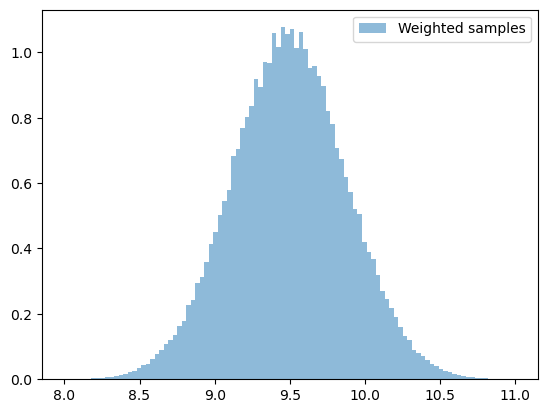

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.array([1, 2, 3, 4, 5])
mu_y = np.array([4.7, 17.7, 45.5, 75.8, 117.4])
sigma_y = np.array([0.7, 1.5, 3.0, 9.0, 10.0])

num_samples = 10**5

# Q(g)
mu, sigma = 9.8, 1

def Q(g):
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * (g - mu)**2 / sigma**2)

# P(g)
def chi_sq(g):
    model = 0.5 * g * (t**2)
    return np.sum((model - mu_y)**2 / sigma_y**2)

chi_sq = np.vectorize(chi_sq)

def P(g):
    return np.exp(-chi_sq(g) / 2)

# Generate N samples for g from Q(g)
num_samples = 10**5
g_samples = np.random.normal(mu, sigma, num_samples)

# Normalized weight
w_unnormalized = P(g_samples) / Q(g_samples)
w = w_unnormalized / np.mean(w_unnormalized)

# Calculate the weighted mean and the uncertainty
def weighted_mean(g, w):
    return np.sum(g * w) / np.sum(w)

def weighted_std(g, w):
    mean = weighted_mean(g, w)
    g2 = np.sum((g**2) * w) / np.sum(w)
    variance = g2 - mean**2
    return np.sqrt(variance)

# Print the "best value" of g with uncertainty
print(f'The "best value" of g is: {weighted_mean(g_samples, w):.2f} +- {weighted_std(g_samples, w):.2f}')

# Weighted histogram
plt.hist(g_samples, range=[8, 11], bins=100, alpha=0.5, weights=w, density=True, label='Weighted samples')
plt.legend()
plt.show()
